# Support Vector Machines

More appropriately [support vector classifier with linear kernel](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC).

In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import warnings

warnings.filterwarnings('ignore')

df_AIMD = pd.read_csv("Dist_AIMD.csv") 
df_MD = pd.read_csv('Dist_MD.csv')
df_fin = pd.concat([df_AIMD, df_MD])

df_shuffle = shuffle(df_fin, random_state=0)

from sklearn.model_selection import train_test_split

# Data selection 
# First we shall select the closest oxygens and later add the rest to see the effects of increasing features
# Then we will repeat it for hydrogens
X3 = df_shuffle[['S-O1', 'C-O1', 'N-O1']]
X6 = df_shuffle[['S-O1', 'C-O1', 'N-O1', 'S-O2', 'C-O2', 'N-O2']]

H3 = df_shuffle[['S-H1', 'C-H1', 'N-H1']]
H6 = df_shuffle[['S-H1', 'C-H1', 'N-H1', 'S-H2', 'C-H2', 'N-H2']]
y = df_shuffle['Class']

# Splitting the data into training(80%) and test(20%) set

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.20, random_state=0)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size=0.20, random_state=0)

## Support vector classifier with linear kernel can be used for binary (two classes) or "multi-class" classifications. 

Besides the linear kernel it also supports other kernels for data which may not be linearly separable. Our data seems to be linearly separable so we will not be exploring other kernels like RBFs in detail, but will test the accuracy with polynomial kernel


In [2]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=0)

# For the 3 feature model
svm.fit(X3_train, y3_train)

print("Number of features in the model:",svm.n_features_in_)
print("Feature and weights:",sorted(list(zip(svm.feature_names_in_, svm.coef_.flatten())), key=lambda x:x[1], reverse=True))
print("Accuracy for support vector classifier(C=1.0) and 3 features:",svm.score(X3_test, y3_test))

# For the 6 feature model
svm.fit(X6_train, y6_train)

print("\nNumber of features in the model:",svm.n_features_in_)
print("Feature and weights:",sorted(list(zip(svm.feature_names_in_, svm.coef_.flatten())), key=lambda x:x[1], reverse=True))
print("Accuracy for support vector classifier(C=1.0) and 6 features:",svm.score(X6_test, y6_test))

Number of features in the model: 3
Feature and weights: [('N-O1', 4.664903400826105), ('C-O1', 4.166898579496246), ('S-O1', 3.3135330050571645)]
Accuracy for support vector classifier(C=1.0) and 3 features: 0.8571428571428571

Number of features in the model: 6
Feature and weights: [('N-O2', 4.259388630494974), ('C-O2', 3.246222439688719), ('C-O1', 1.9992371186544826), ('S-O1', 1.8603813362408808), ('S-O2', 1.4526045613453804), ('N-O1', 1.2428553213502491)]
Accuracy for support vector classifier(C=1.0) and 6 features: 0.9285714285714286


### As seen in logistic regression, for the 3 feature model the N-O1 feature holds the most weight and in the 6 feature model the N-O2 holds the most weight. 

### The feature weights are only availabel for the linear kernels.  

In [3]:
# For polynomial kernels

svm = SVC(kernel='poly', degree=3, C=1.0, gamma='auto', random_state=0)
#gamma = 'auto' means it is 1/n_features

# For the 3 feature model
svm.fit(X3_train, y3_train)

print("Number of features in the model:",svm.n_features_in_)
print("Accuracy for svc(kernel='poly', degree=3, C=1.0, gamma='auto') and 3 features:",svm.score(X3_test, y3_test))

# For the 6 feature model
svm.fit(X6_train, y6_train)

print("\nNumber of features in the model:",svm.n_features_in_)
print("Accuracy for svc(kernel='poly', degree=3, C=1.0, gamma='auto') and 3 features:",svm.score(X6_test, y6_test))

Number of features in the model: 3
Accuracy for svc(kernel='poly', degree=3, C=1.0, gamma='auto') and 3 features: 0.8690476190476191

Number of features in the model: 6
Accuracy for svc(kernel='poly', degree=3, C=1.0, gamma='auto') and 3 features: 0.9523809523809523


### Non-linear kernels have other parameters which need to be abjusted,
1. degree = Degree of polynomial to consider for kernel = 'poly', default is 3
2. C = Regularization parameter, also present for linear kernels and smaller values mean more regularization
3. gamma = Kernel width parameter, 'auto' means 1/number_of_features

The accuracy compared to linear kernels seems to be larger but more parameters means it is difficult to optimize and the absence of feature weights makes any kind of interpretation of the classification difficult. However, in a later notebook we will explore how the kernel impacts the learning.

In [4]:
# Cross val score
from sklearn.model_selection import cross_val_score

svm_lin = SVC(kernel='linear', C=1.0, random_state=0)
svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='auto', random_state=0)
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='auto', random_state=0)

print("5 fold cross valildation for the linear svc with 3 and 6 features respectively")
cv3_scores_lin = cross_val_score(svm_lin, X3, y, cv=5)
print(cv3_scores_lin, np.mean(cv3_scores_lin))

cv6_scores_lin = cross_val_score(svm_lin, X6, y, cv=5)
print(cv6_scores_lin, np.mean(cv6_scores_lin))

print("\n5 fold cross valildation for the polynomial svc with 3 and 6 features respectively")
cv3_scores_pol = cross_val_score(svm_poly, X3, y, cv=5)
print(cv3_scores_pol, np.mean(cv3_scores_pol))

cv6_scores_pol = cross_val_score(svm_poly, X6, y, cv=5)
print(cv6_scores_pol, np.mean(cv6_scores_pol))

print("\n5 fold cross valildation for the rbf svc with 3 and 6 features respectively")
cv3_scores_rbf = cross_val_score(svm_rbf, X3, y, cv=5)
print(cv3_scores_rbf, np.mean(cv3_scores_rbf))

cv6_scores_rbf = cross_val_score(svm_rbf, X6, y, cv=5)
print(cv6_scores_rbf, np.mean(cv6_scores_rbf))

5 fold cross valildation for the linear svc with 3 and 6 features respectively
[0.86904762 0.88095238 0.8313253  0.92771084 0.80722892] 0.8632530120481927
[0.92857143 0.9047619  0.92771084 0.97590361 0.90361446] 0.9281124497991968

5 fold cross valildation for the polynomial svc with 3 and 6 features respectively
[0.88095238 0.9047619  0.81927711 0.93975904 0.8313253 ] 0.8752151462994837
[0.94047619 0.9047619  0.92771084 0.97590361 0.90361446] 0.9304934021801492

5 fold cross valildation for the rbf svc with 3 and 6 features respectively
[0.83333333 0.9047619  0.85542169 0.91566265 0.80722892] 0.8632816982214573
[0.91666667 0.89285714 0.91566265 0.97590361 0.89156627] 0.9185312679288582


In the case of SVC cross validaton worsens the accuracy score slightly but not enough to consider overfitting in the train-test dataset. We only consider linear kernels in the validation curve,

## Valildation curve

In this case C is a squared l2 penalty, and we will test its effects in the range [0.01, 10]

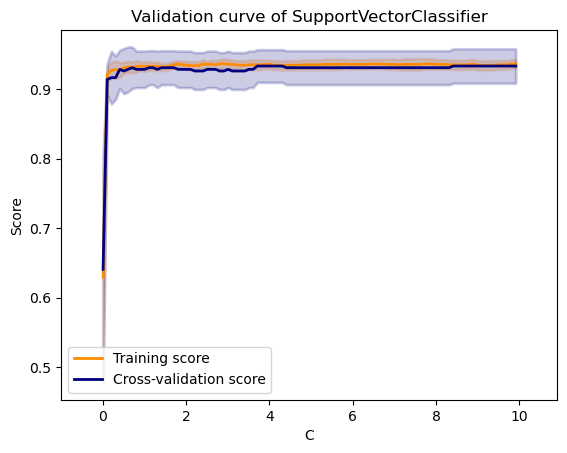

In [5]:
from sklearn.model_selection import validation_curve
import my_utils

param_range = np.arange(0.01, 10, 0.1)

train_score, test_score = validation_curve(SVC(kernel='linear', random_state=0), X6, y, 
                                          param_name = 'C', param_range = param_range, cv=5)

my_utils.plot_validation_curve(train_score, test_score, param_range, 'SupportVectorClassifier', 'C')

Compared to the KNearestNeighbor case, where the train score started with 1.0 which indicated overfitting, both training and cross-validation scores start from 0.5 at very low values of C (very high regularization). Considering the split of MD and AIMD datasets, the model is being underfit with very high regularization. 

The scores stabilize around C = 1.0 and to confirm it we will plot another validation curve ranging from [1,100]

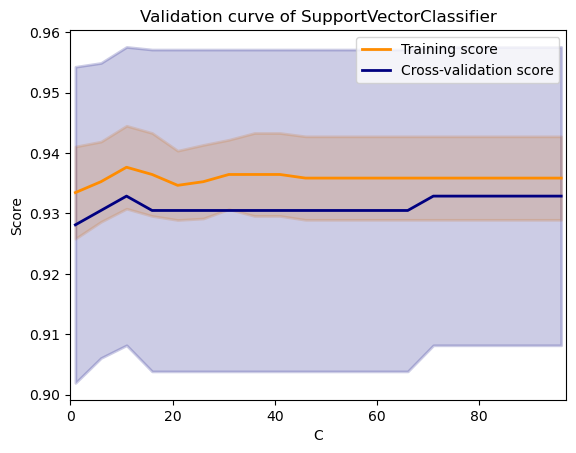

In [6]:
# new param range
param_range1 = np.arange(1, 100, 5)

train_score, test_score = validation_curve(SVC(kernel='linear', random_state=0), X6, y, 
                                          param_name = 'C', param_range = param_range1, cv=5)

my_utils.plot_validation_curve(train_score, test_score, param_range1, 'SupportVectorClassifier', 'C')

This validation curve shows stable behavior wrt C, upto C=100 and compared to other models the cross-validation standard deviation is the lowest yet. 

## Repeating the calculations for the hydrogen datasets

In [7]:
# train test split

X3_train, X3_test, y3_train, y3_test = train_test_split(H3, y, test_size=0.20, random_state=0)
X6_train, X6_test, y6_train, y6_test = train_test_split(H6, y, test_size=0.20, random_state=0)

# Define the kernel
svm = SVC(kernel='linear', C=1.0, random_state=0)

# For the 3 feature model
svm.fit(X3_train, y3_train)

print("Number of features in the model:",svm.n_features_in_)
print("Feature and weights:",sorted(list(zip(svm.feature_names_in_, svm.coef_.flatten())), key=lambda x:x[1], reverse=True))
print("Accuracy for support vector classifier(C=1.0) and 3 features:",svm.score(X3_test, y3_test))

# For the 6 feature model
svm.fit(X6_train, y6_train)

print("\nNumber of features in the model:",svm.n_features_in_)
print("Feature and weights:",sorted(list(zip(svm.feature_names_in_, svm.coef_.flatten())), key=lambda x:x[1], reverse=True))
print("Accuracy for support vector classifier(C=1.0) and 6 features:",svm.score(X6_test, y6_test))

Number of features in the model: 3
Feature and weights: [('C-H1', 5.060519381825673), ('N-H1', 2.95575112366824), ('S-H1', 2.4945636719053708)]
Accuracy for support vector classifier(C=1.0) and 3 features: 0.8571428571428571

Number of features in the model: 6
Feature and weights: [('C-H2', 4.405893053854177), ('N-H2', 2.8982174172413204), ('C-H1', 2.3430816361520073), ('S-H1', 1.5001988813316838), ('N-H1', 0.9913396924002942), ('S-H2', 0.8304348920987339)]
Accuracy for support vector classifier(C=1.0) and 6 features: 0.9166666666666666


In [8]:
svm_lin = SVC(kernel='linear', C=1.0, random_state=0)
svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='auto', random_state=0)

print("5 fold cross valildation for the linear svc with 3 and 6 features respectively")
cv3_scores_lin = cross_val_score(svm_lin, H3, y, cv=5)
print(cv3_scores_lin, np.mean(cv3_scores_lin))

cv6_scores_lin = cross_val_score(svm_lin, H6, y, cv=5)
print(cv6_scores_lin, np.mean(cv6_scores_lin))

print("\n5 fold cross valildation for the polynomial svc with 3 and 6 features respectively")
cv3_scores_pol = cross_val_score(svm_poly, H3, y, cv=5)
print(cv3_scores_pol, np.mean(cv3_scores_pol))

cv6_scores_pol = cross_val_score(svm_poly, H6, y, cv=5)
print(cv6_scores_pol, np.mean(cv6_scores_pol))

5 fold cross valildation for the linear svc with 3 and 6 features respectively
[0.86904762 0.89285714 0.81927711 0.92771084 0.8313253 ] 0.868043602983362
[0.94047619 0.95238095 0.92771084 0.96385542 0.86746988] 0.9303786574870913

5 fold cross valildation for the polynomial svc with 3 and 6 features respectively
[0.89285714 0.89285714 0.81927711 0.92771084 0.84337349] 0.8752151462994837
[0.91666667 0.94047619 0.91566265 0.96385542 0.86746988] 0.9208261617900172


### In the case of hydrogens, the performace is sligtly worse than the oxygens but not by much. Now for the validation curve 

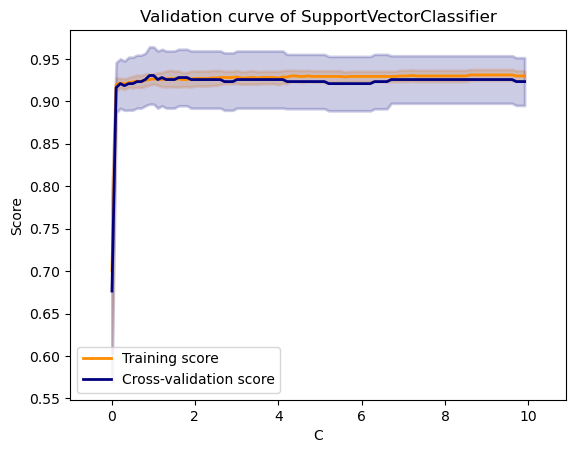

In [9]:
param_range = np.arange(0.01, 10, 0.1)

train_score, test_score = validation_curve(SVC(kernel='linear', random_state=0), H6, y, 
                                          param_name = 'C', param_range = param_range, cv=5)

my_utils.plot_validation_curve(train_score, test_score, param_range, 'SupportVectorClassifier', 'C')

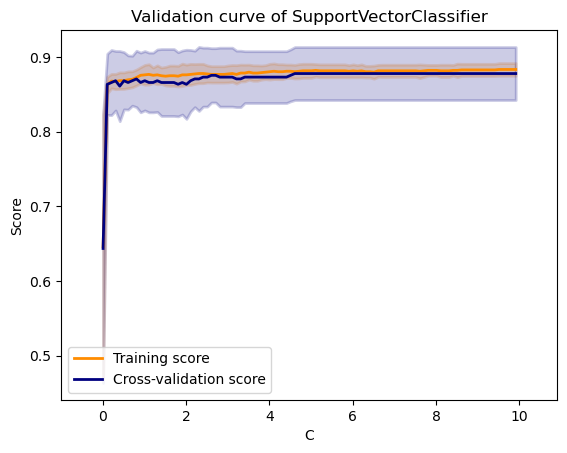

In [10]:
# For the 3 feature model

param_range = np.arange(0.01, 10, 0.1)

train_score, test_score = validation_curve(SVC(kernel='linear', random_state=0), H3, y, 
                                          param_name = 'C', param_range = param_range, cv=5)

my_utils.plot_validation_curve(train_score, test_score, param_range, 'SupportVectorClassifier', 'C')

### To drive home the point of underfitting we introduce dummy classifiers

In [11]:
# Use SVC with a low C and fit 

svc = SVC(kernel='linear', C=0.01, random_state=0).fit(X6_train, y6_train)

print("SVC(C=0.01) train accuracy score:", svc.score(X6_train, y6_train))
print("SVC(C=0.01) test accuracy score:", svc.score(X6_test, y6_test))

# Introduce dummy classifer that classifies according to the most common class in training set

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent').fit(X6_train, y6_train)

print("\nDummy classifier training score: ", dummy.score(X6_train, y6_train))
print("Dummy classifier test score: ", dummy.score(X6_test, y6_test))


print("\nNumber of unique classes in the shuffled df: \n",y6_train.value_counts())
print("Dummy predictions, ",dummy.predict(X6_test))

SVC(C=0.01) train accuracy score: 0.5165165165165165
SVC(C=0.01) test accuracy score: 0.4523809523809524

Dummy classifier training score:  0.5105105105105106
Dummy classifier test score:  0.4523809523809524

Number of unique classes in the shuffled df: 
 0    170
1    163
Name: Class, dtype: int64
Dummy predictions,  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


As shown above the dummy classifier always predicts 0 since 0 (MD) is the most frequent class in the training set (170). The accuracy score of the dummy classifier is almost the same as the one for SVC with C=0.01 (very high regularization), which implies the model is underfitting the training data.  

A dummy classifer is used to give a baseline to predictions and is very useful if we have imbalances in the data.